In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("drugsComTest_raw.csv")

In [3]:
df.head(2)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17


In [4]:
import html

# Decode HTML entities in the 'review' column
df['review'] = df['review'].apply(html.unescape)

# Drop rows with missing values in critical columns
df.dropna(subset=['review', 'rating'], inplace=True)

# Convert rating to numeric (in case it's not)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create a new column for sentiment
df['sentiment'] = df['rating'].apply(lambda x: 'positive' if x > 5 else 'negative')

print(df[['review', 'rating', 'sentiment']].head())


C:\Users\shoai\AppData\Local\Temp\ipykernel_9280\1204149823.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


                                              review  rating sentiment
0  "I've tried a few antidepressants over the yea...      10  positive
1  "My son has Crohn's disease and has done very ...       8  positive
2                      "Quick reduction of symptoms"       9  positive
3  "Contrave combines drugs that were used for al...       9  positive
4  "I have been on this birth control for one cyc...       9  positive


In [5]:
df[['review', 'rating', 'sentiment']].head()

,review,rating,sentiment
0,"""I've tried a few antidepressants over the yea...",10,positive
1,"""My son has Crohn's disease and has done very ...",8,positive
2,"""Quick reduction of symptoms""",9,positive
3,"""Contrave combines drugs that were used for al...",9,positive
4,"""I have been on this birth control for one cyc...",9,positive


In [6]:
df = df[['review', 'rating', 'sentiment']]

In [7]:
df.sample(5)

,review,rating,sentiment
31685,"""I was taking this pill for a month and I star...",1,negative
22667,"""Lexapro saved my life and saved my mind. I h...",10,positive
29207,"""Amazing!! I never knew a product could work f...",10,positive
36769,"""I started taking Apri, because my periods bec...",4,negative
33698,"""Of any generic, Endocet seems to work the bes...",8,positive


In [8]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation/numbers
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

df['clean_review'] = df['review'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shoai\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [9]:
df.sample(5)

,review,rating,sentiment,clean_review
14380,"""In 2009 after 6 rounds of RCHOP chemo, then B...",9,positive,rounds rchop chemo bcnu chemo hospital bone ma...
13230,"""I was on the pill for 6 months, and this was ...",7,positive,pill months first time taking birth control pi...
15474,"""I started taking this birth control almost 2 ...",9,positive,started taking birth control almost years ago ...
11701,"""I have only good things to say, just a little...",8,positive,good things say little bad note stopping start...
41569,"""I was on Depo for 9 yrs. The cost of the shot...",10,positive,depo yrs cost shot office visits xyear prohibi...


In [10]:
pip install wordcloud


  Using cached wordcloud-1.9.4-cp310-cp310-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp310-cp310-win_amd64.whl (299 kB)


In [11]:
df.head(2)

,review,rating,sentiment,clean_review
0,"""I've tried a few antidepressants over the yea...",10,positive,ive tried antidepressants years citalopram flu...
1,"""My son has Crohn's disease and has done very ...",8,positive,son crohns disease done well asacol complaints...


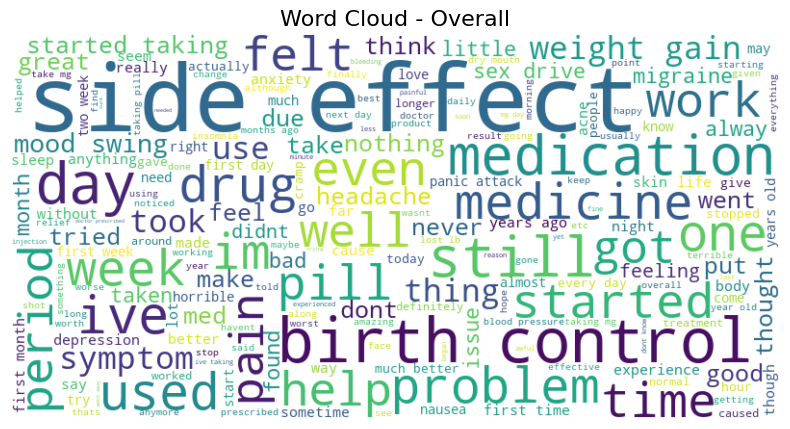

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Overall
plot_wordcloud(' '.join(df['clean_review']), 'Word Cloud - Overall')

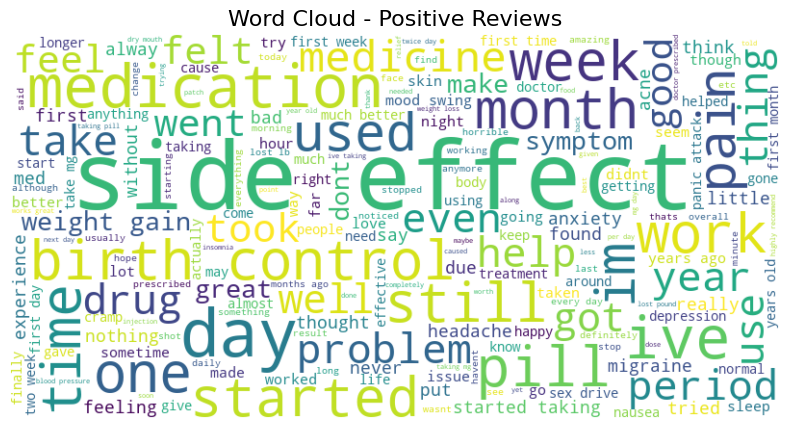

In [13]:
# Positive
plot_wordcloud(' '.join(df[df['sentiment'] == 'positive']['clean_review']), 'Word Cloud - Positive Reviews')

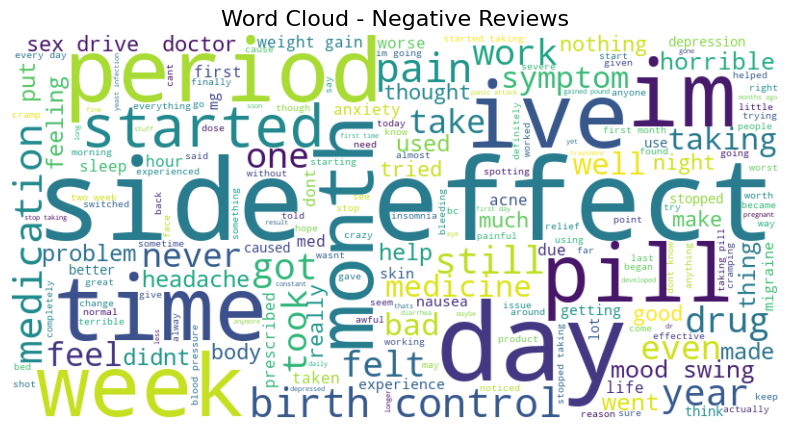

In [14]:
# Negative
plot_wordcloud(' '.join(df[df['sentiment'] == 'negative']['clean_review']), 'Word Cloud - Negative Reviews')

In [15]:
df.sample(5)

,review,rating,sentiment,clean_review
35448,"""This is the best cough medicine out there. W...",10,positive,best cough medicine whenever get chest colds k...
16529,"""I had Psoriasis on my elbows and i was prescr...",9,positive,psoriasis elbows prescribed daivonex job gets ...
17350,"""I have been taking it for 30 days and no chan...",1,negative,taking days change ringing noticed
52731,"""I've been on this medication for several mont...",8,positive,ive medication several months definite change ...
51893,"""Makes me feel like I have a hangover the next...",9,positive,makes feel like hangover next morning helps ma...


In [16]:
df.shape

(53766, 4)

In [17]:
df.sentiment.value_counts()

sentiment
positive    37559
negative    16207
Name: count, dtype: int64

In [18]:
# Separate the classes
positive_df = df[df['sentiment'] == 'positive']
negative_df = df[df['sentiment'] == 'negative']

# Downsample the positive class to match the negative count
positive_downsampled = positive_df.sample(n=len(negative_df), random_state=42)

# Combine the balanced data
df_balanced = pd.concat([positive_downsampled, negative_df])

# Shuffle the dataset
df = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [19]:
df.shape

(32414, 4)

In [20]:
df.sentiment.value_counts()

sentiment
positive    16207
negative    16207
Name: count, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import re

In [22]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_review'])  # Text features
y = df['sentiment']                          # Labels


In [23]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [24]:
# Logistic Regression Classifier
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [25]:
# Predictions
y_pred = lr_model.predict(X_test)


In [26]:
# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    negative       0.79      0.80      0.80      3242
    positive       0.80      0.79      0.80      3241

    accuracy                           0.80      6483
   macro avg       0.80      0.80      0.80      6483
weighted avg       0.80      0.80      0.80      6483

Confusion Matrix:
 [[2601  641]
 [ 675 2566]]


In [27]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [28]:
# Save the model
joblib.dump(lr_model, 'logistic_regression_sentiment_model.pkl')

# Save the vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

## ====================================================

In [29]:
# Load the saved model and vectorizer
loaded_model = joblib.load('logistic_regression_sentiment_model.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')


In [30]:
# Function to clean input like before
stop_words = set(["the", "is", "and", "in", "to", "of"])  # example stopwords, replace with your list
def clean_input_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Get input from user
user_input = input("Enter a review: ")
cleaned_input = clean_input_text(user_input)

# Vectorize and predict

input_vector = loaded_vectorizer.transform([cleaned_input])
prediction = loaded_model.predict(input_vector)[0]

print(f"Predicted Sentiment: {prediction.capitalize()}")

Predicted Sentiment: Positive
